In [26]:
###### Config #####
import sys, os, platform
if os.path.isdir("ds-assets"):
  !cd ds-assets && git pull
else:
  !git clone https://github.com/lutzhamel/ds-assets.git
colab = True if 'google.colab' in os.sys.modules else False
system = platform.system() # "Windows", "Linux", "Darwin"
home = "ds-assets/assets/"
sys.path.append(home)  

Already up to date.


In [27]:
# notebook level imports
import pandas   # general data tool box
from  matplotlib.pyplot import show as showfigure  # show figures in a loop

# The Analysis Pipeline
At the core of programming for data science we have the following pipeline:


![pipeline.png](https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/pipeline.png)

# Import and Explore



## The Iris Dataset


* One of the most famous data sets in statistics/data science.
* Describes three species of iris.
* The data set is described further [here](https://archive.ics.uci.edu/dataset/53/iris).

## Import CSV Files as Dataframes: Pandas
Perhaps the simplest data source is the Comma Separated Value (CSV) file.  Here are the first couple of rows of the iris dataset (using a magic command to execute OS level commands):




In [28]:
if system == "Windows":
  !type ds-assets\assets\iris.csv
else:
  !head ds-assets/assets/iris.csv

"id","Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species"
"1",5.1,3.5,1.4,0.2,"setosa"
"2",4.9,3,1.4,0.2,"setosa"
"3",4.7,3.2,1.3,0.2,"setosa"
"4",4.6,3.1,1.5,0.2,"setosa"
"5",5,3.6,1.4,0.2,"setosa"
"6",5.4,3.9,1.7,0.4,"setosa"
"7",4.6,3.4,1.4,0.3,"setosa"
"8",5,3.4,1.5,0.2,"setosa"
"9",4.4,2.9,1.4,0.2,"setosa"


**Header row**, column names comma separated.
Then **one row for each observation/object**, attribute values are comma separated.


Pandas has support for reading and writing CSV files and stores them as dataframes in the notebook. Read the file: recall that the 'home' variable points to the CSC310 resources available to this notebook.


In [29]:
iris_df = pandas.read_csv(home+'iris.csv')

The 'shape' function is a quick way to see what the dataframe looks like in memory: (# rows, # columns)

* rows - objects in the dataframe
* columns - attributes of the objects




In [30]:
iris_df.shape

(150, 6)

A more detailed view of the data set can be had with the 'head' function.  Although not very useful for data sets with a lot of attributes but it works great for the kind of data sets we are going to be working with.  Here n is the number of rows to display.

In [31]:
iris_df.head(n=5)

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


Notice that for the rows Pandas insert its own row identifier.  For the column identifiers it uses the given attribute names.

## More Detailed Dataframe Analysis

Check whether columns are numerical or categorical. **Almost everything with Pandas can be done via computations**.  In this case we access the attribute names and then access the data type of that attribute and map it into the data types we covered at the beginning of the course:

* numeric (continuous/discrete)
* categorical (nominal/ordinal) -- the subclassification of categorical datatypes **cannot** be done automatically!

In [32]:
print(list(iris_df.columns))

['id', 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']


Classifying each one of the variables:

* variable 'id':

In [33]:
print(iris_df['id'].dtype)
iris_df['id'].head()

int64


0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64

The variable is a discrete numeric variable.

* The variable 'Sepal.Length'

In [34]:
print(iris_df['Sepal.Length'].dtype)
iris_df['Sepal.Length'].head()

float64


0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: Sepal.Length, dtype: float64

The variable is a continuous numeric variable. The other three measurement variables are also continuous numeric variabls.

* The variable 'Species'

In [35]:
print(iris_df['Species'].dtype)
iris_df['Species'].head()

object


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

The fact the the variable does not show up as either int or float means that it is a **categorical variable**.

In [36]:
# print out all the values of the categorical variable
iris_df['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [37]:
# we can also do this...
iris_df['Species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

We can see that the values are different flower names and we can infer that there is no hierarchy (we cannot put the different flowers in some kind of ordering).  Therefore, this variable is a **nominal categorical variable**.

**Observation**: We have a mix of numeric and categorical attributes.


### Descriptive Statistics

In data science basic descriptive statistics of  numerical attributes is so important that Pandas has a special function for that: 'describe'

Even though we apply this function to the whole dataframe, this function only looks at the numerical attributes and returns a summary of the basic descriptive statistics for those attributes.

In [38]:
iris_df.describe()  # only deals with numerical attributes!

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


For categorical attributes we have to do a little bit more work.  Two aspects of categorical variables are important:

1.   The labels (levels) of a variables and how often each of the labels appears in the variable
2.   The mode of a variable -- the mode is the label that appear most often in a variable

Pandas has dataframe functions to address both of these aspects.

In [39]:
# compute the labels/levels that appear in the categorical species attribute
iris_df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [40]:
# compute the mode of the categorical attribute Species
iris_df['Species'].mode()

0        setosa
1    versicolor
2     virginica
Name: Species, dtype: object

Note that here all three labels represent the mode since they all appear an equal number of times.

## The [x] vs [[x]] Notation

Attributes in Pandas dataframes can be accessed in one of two ways:

1. Using the simple square brackets 'df[x]'.  This will return a **series** which is Pandas' implementation of a Python vector.

2. Using the double square brackets 'df[[x]]'. This will return a **dataframe**.

The difference is subtle but we will encounter this later when we look at models where some models only work with dataframes and vice versa.

In [42]:
type(iris_df['Sepal.Length'])

pandas.core.series.Series

In [43]:
type(iris_df[['Sepal.Length']])

pandas.core.frame.DataFrame

## Basic Visualization

We saw in our detailed analysis that the dataset has mostly numeric variables but also has one categorical attribute: 'Species'



Let's plot the **categorical** attribute via a **bar graph**.

<Axes: xlabel='Species'>

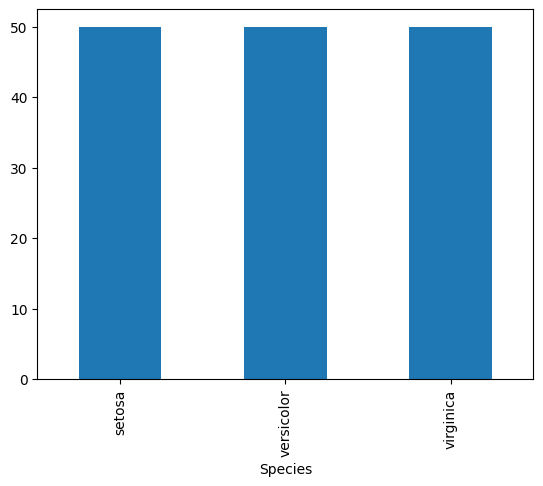

In [44]:
iris_df['Species'].value_counts().plot.bar()

**Observation**: The three labels of this categorical variable appear an equal number of times meaning that each label is represented equally in the dataset.

With **numerical** variables it is customary to plot them with **histograms** which give us an insight of **how values are distributed**. E.g.

<Axes: ylabel='Frequency'>

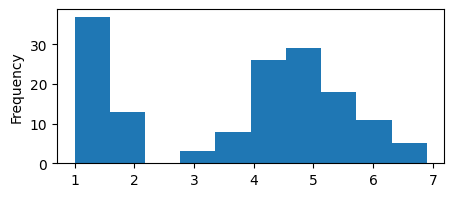

In [45]:
# histogram plot of a single numerical attribute
iris_df['Petal.Length'].plot.hist(figsize=(5,2))  # figsize = (width,height)

We can construct histograms for all our numerical attributes by iterating over the attributes.

	variable: id


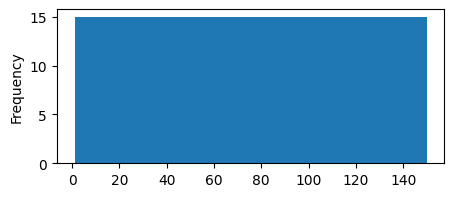

	variable: Sepal.Length


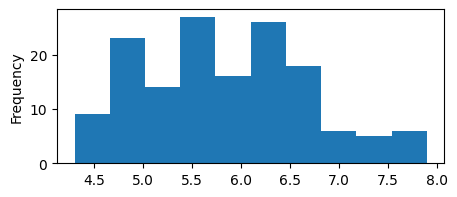

	variable: Sepal.Width


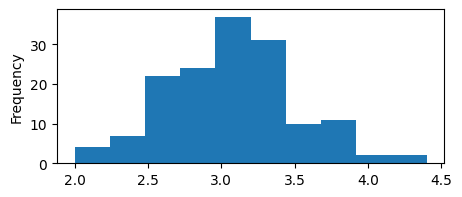

	variable: Petal.Length


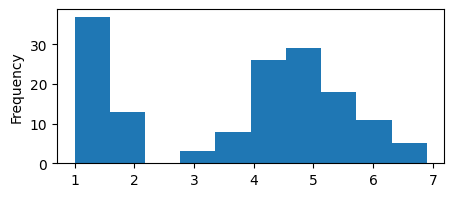

	variable: Petal.Width


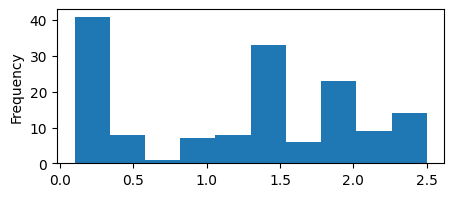

In [46]:
numerical_attrs = ['id','Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

for a in numerical_attrs:
  print('\tvariable: '+a) # print out the name of the attribute
  iris_df[a].plot.hist(figsize=(5,2))
  showfigure()


**Observations**:

1. The 'id' variable is **uniformly** distributed.

1. The 'Sepal.Width' variable has a **normal distribution** and is **unimodal**

1. The remaining variables are **multimodal** distribution.

## Distributions

Distributions tell us how values behave within a particular **numerical** variable.  In **unimodal** distributions (distributions with one peak) the peak of the distribution is often a close representatioin of the mean or average of the values of the variable.

<img src="https://www.statology.org/wp-content/uploads/2021/02/multimodal3.png" height="300" width="400">

The values of the y-axis tell us the likelihood of a particular value occuring in a dataset.

**Multimodal** distributions have more than one peak.  The are often the result of multiple distributions occuring within a single variable.  

Consider the scores of students in a a class. There is a distribution of grades of students who did study and then there is a distribution of students who did not study. Both distributions occuring in the same variable each giving rise to a different peak.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/bimodal-distribution-2.png" height="350" width="400">

We will have more to say about distributions when we discuss data visualization in more detail.

(source: http://www.statisticshowto.com/multimodal-distribution/)

# Transform

Transforming the data is the next step in our pipeline.

![pipeline.png](https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/pipeline.png)

* The `id` column in the iris dataset does not add any information, it has a **uniform** distribution, that is,every value has the exact same probability of occurring in the dataset: It assigns a unique number to each row of the table.
* We want to just drop this column from our dataset


<Axes: ylabel='Frequency'>

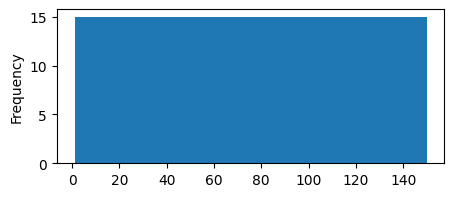

In [47]:
iris_df['id'].plot.hist(figsize=(5,2))

We use the drop function to drop the ‘id’ column.


In [48]:
iris_df.shape

(150, 6)

In [49]:
iris_new_df = iris_df.drop(columns=['id']) # columns = <list of column names>

In [50]:
iris_new_df.shape

(150, 5)

Notice the fact that we have one fewer columns in our new dataframe.  Looking at the remaining  attributes.

In [51]:
iris_new_df.head(n=5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Reading

* [2.1 Understanding Data Types in Python](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)
* [3.1 Introducing Pandas Objects](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)
* [Pandas Dataframe API Reference](https://pandas.pydata.org/docs/reference/frame.html) - search for DataFrame.plot.{plot name}


# Project

See Brightspace Assignment #1.

